In [2]:
import torch
from matplotlib import pyplot as plt
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

In [10]:
class XORDataset(Dataset):
    def __init__(self, X1, X2, y):
        super().__init__()
        self.X1 = X1.reshape(-1, 1)
        self.X2 = X2.reshape(-1, 1)
        self.y = y.reshape(-1, 1)
    
    def __len__(self):
        return self.X1.shape[0]
    
    def __getitem__(self, index):
        return self.X1[index], self.X2[index], self.y[index]

In [16]:
class XOR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 2, bias= True)
        self.activate1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1, bias= True)
        self.activate2 = nn.Sigmoid()
    
    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim= 1)
        z1 = self.linear1(x)
        a1 = self.activate1(z1)
        z2 = self.linear2(a1)
        a2 = self.activate2(z2)
        return a2

In [17]:
X1 = torch.tensor([0, 0, 1, 1], dtype= torch.float32)
X2 = torch.tensor([0, 1, 0, 1], dtype= torch.float32)
y = torch.tensor([0, 1, 1, 0], dtype= torch.float32)

In [18]:
model = XOR()
dataset = XORDataset(X1=X1, X2=X2, y=y)
dataloader = DataLoader(dataset=dataset, batch_size=dataset.__len__(), shuffle= True)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)

In [21]:
loss_list = []
model.train()
for epoch in range(100):
    loss = 0.0
    for input1, input2, target in dataloader:
        optimizer.zero_grad()
        output = model(input1, input2)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        print(f'loss = {loss.item()}')
        a = loss
        loss_list.append(a.detach().numpy())

loss = 0.6945853233337402
loss = 0.6945841908454895
loss = 0.6945831179618835
loss = 0.6945819854736328
loss = 0.6945809721946716
loss = 0.6945798397064209
loss = 0.6945787072181702
loss = 0.6945776343345642
loss = 0.6945765018463135
loss = 0.6945755481719971
loss = 0.6945743560791016
loss = 0.6945732831954956
loss = 0.6945722103118896
loss = 0.6945710182189941
loss = 0.694570004940033
loss = 0.6945688128471375
loss = 0.6945677995681763
loss = 0.6945666670799255
loss = 0.6945656538009644
loss = 0.6945644617080688
loss = 0.6945634484291077
loss = 0.6945623159408569
loss = 0.694561243057251
loss = 0.694560170173645
loss = 0.6945590972900391
loss = 0.6945579648017883
loss = 0.6945568323135376
loss = 0.6945558190345764
loss = 0.6945546865463257
loss = 0.6945536136627197
loss = 0.6945526003837585
loss = 0.6945514678955078
loss = 0.6945503950119019
loss = 0.6945493221282959
loss = 0.6945482492446899
loss = 0.694547176361084
loss = 0.694546103477478
loss = 0.6945449709892273
loss = 0.69454389

[]

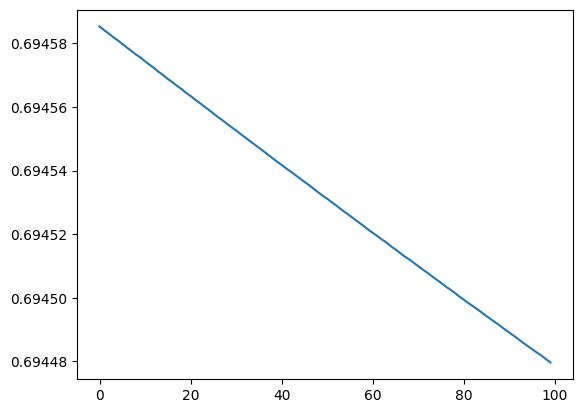

In [22]:
plt.plot(loss_list)
plt.plot()